In [1]:
#This notebook demonstrates the accuracy of in-built classifiers from scikit learn's library with regards to
#(a) Various synthetic dataset - usign scikit learns make_blobs, make_moons, make_circles
#(b) Performance on the generated data with the addition of noise dimensions 

In [92]:
#The classifiers that will be tested are
# 1.Random forest
# 2.SVM
# 3.KNN

In [93]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [94]:
#set up the datasets
#Parameter - set number of samples = 100, features(dimensions) = 2, number of classes = 3, number of clusters = 3
samps = 500
feats = 2
from sklearn.datasets import make_blobs
Input_data = [make_blobs(n_samples=samps, n_features=feats, centers=2, cluster_std=1.6, 
                   center_box=(-5.0, 5.0), shuffle=False, random_state=1),
 make_moons(n_samples=samps, noise=0.2, random_state=1),
make_circles(n_samples=samps, noise=0, factor=0.5, random_state=1)]            

In [95]:
#Store the input data and the associated labels to a variable
(X1,y1) = Input_data[0]
(X2,y2) = Input_data[1]
(X3,y3) = Input_data[2]
#print("Dimensions of the original data is", X3.shape)

In [96]:
from sklearn import preprocessing

In [97]:
scaler = preprocessing.StandardScaler()

In [98]:
X1_scaled=scaler.fit_transform(X1)
X2_scaled=scaler.fit_transform(X2)
X3_scaled=scaler.fit_transform(X3)
#print("The valriance all", np.var(X1_scaled),np.var(X2_scaled),np.var(X3_scaled))

In [99]:
names = ["SVM", "Random Forest", "KNN" ]
Models = [svm.SVC(kernel='linear'), 
          RandomForestClassifier(n_estimators=50, random_state=1, max_features = 'sqrt'),
          KNeighborsClassifier(n_neighbors=3)]

In [100]:
def fit_predict(train_data, test_data, train_label , test_label):
    accuracies = []
    for name, model in zip(names, Models):
        model.fit(train_data, train_label)
        score = model.score(test_data, test_label)
        accuracies.append(score)
    
    SVM_acc = accuracies[0]
    RF_acc = accuracies[1]
    KNN_acc = accuracies[2]
#     print("Accuracy for SVM", accuracies[0])
#     print("Accuracy for RF", accuracies[1])
#     print("Accuracy for KNN", accuracies[2])
    return SVM_acc,RF_acc,KNN_acc

In [101]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scaled, y1, test_size=0.25, random_state=1)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.25, random_state=1)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_scaled, y3, test_size=0.25, random_state=1)

SVM1, RF1, KNN1 = fit_predict(X1_train, X1_test, y1_train, y1_test)
print("Acurracy1- ", SVM1, RF1, KNN1)
SVM2, RF2, KNN2 = fit_predict(X2_train, X2_test, y2_train, y2_test)
print("Accuracy2- ", SVM2, RF2, KNN2 )
SVM3, RF3, KNN3 = fit_predict(X3_train, X3_test, y3_train, y3_test)
print("Accuracy3- ", SVM3, RF3, KNN3)


Acurracy1-  0.952 0.952 0.952
Accuracy2-  0.824 0.912 0.936
Accuracy3-  0.416 1.0 1.0


In [138]:
#Define various levels of noise dimensions
#noise dimensions to try n = 4,6,10,20,100,500,1000,1500
n_dim = X1.shape[0]
#print(n_dim)
#m_dim = [2, 4, 6, 20, 200, 400, 1200, 2000]
m_dim = [0,2, 4, 6, 20, 200, 400, 1200]
#initially, each new set of gaussion noise contained a different sigma value.
#Now, create the dimensions with a set sigma value and then change it over 10 iterations
mu = 0

gauss_noise1 = []
gauss_noise2 = []
gauss_noise3 = []
sigma = np.sqrt([0.1, 1, 10])
# print(sigma)

for i in range(len(m_dim)):
        gauss_noise1.append(np.random.normal(mu, sigma[0], size = [n_dim, m_dim[i]]))
        gauss_noise2.append(np.random.normal(mu, sigma[1], size = [n_dim, m_dim[i]]))
        gauss_noise3.append(np.random.normal(mu, sigma[2], size = [n_dim, m_dim[i]]))
        
# print(len(gauss_noise1))

In [139]:
tot_noise = [gauss_noise1, gauss_noise2, gauss_noise3]

In [140]:
for k in range(8):
    print(gauss_noise1[k].shape)

(500, 0)
(500, 2)
(500, 4)
(500, 6)
(500, 20)
(500, 200)
(500, 400)
(500, 1200)


In [141]:
#concatenate all the noise dimensions to the original data
X_noise_dims1 = []
X_noise_dims2 = []
X_noise_dims3 = []

for inner_l in tot_noise:
    for item in inner_l:
        X_noise_dims1.append(np.concatenate([X1_scaled, item], axis = 1))
        X_noise_dims2.append(np.concatenate([X2_scaled, item], axis = 1))
        X_noise_dims3.append(np.concatenate([X3_scaled, item], axis = 1))

In [142]:
for l in range(24):
    print(X_noise_dims1[l].shape) 

(500, 2)
(500, 4)
(500, 6)
(500, 8)
(500, 22)
(500, 202)
(500, 402)
(500, 1202)
(500, 2)
(500, 4)
(500, 6)
(500, 8)
(500, 22)
(500, 202)
(500, 402)
(500, 1202)
(500, 2)
(500, 4)
(500, 6)
(500, 8)
(500, 22)
(500, 202)
(500, 402)
(500, 1202)


In [143]:
X1_train_noise = [] 
X1_test_noise = [] 
y1_train_noise = []
y1_test_noise = []

X2_train_noise = [] 
X2_test_noise = [] 
y2_train_noise = []
y2_test_noise = []

X3_train_noise = [] 
X3_test_noise = [] 
y3_train_noise = []
y3_test_noise = []

for z in range(len(X_noise_dims1)):
    X_tr1_n1, X_te1_n1, y_tr1_n1, y_te1_n1 = train_test_split(X_noise_dims1[z], y1, test_size=0.4, random_state=1)
    
    X_tr2_n1, X_te2_n1, y_tr2_n1, y_te2_n1 = train_test_split(X_noise_dims2[z], y2, test_size=0.4, random_state=1)
    
    X_tr3_n1, X_te3_n1, y_tr3_n1, y_te3_n1 = train_test_split(X_noise_dims3[z], y3, test_size=0.4, random_state=1)
    
    X1_train_noise.append(X_tr1_n1)
    X1_test_noise.append(X_te1_n1)
    y1_train_noise.append(y_tr1_n1)
    y1_test_noise.append(y_te1_n1)
    
    X2_train_noise.append(X_tr2_n1)
    X2_test_noise.append(X_te2_n1)
    y2_train_noise.append(y_tr2_n1)
    y2_test_noise.append(y_te2_n1)
    
    X3_train_noise.append(X_tr3_n1)
    X3_test_noise.append(X_te3_n1)
    y3_train_noise.append(y_tr3_n1)
    y3_test_noise.append(y_te3_n1)

In [144]:
accuracy_SVM1 = []
accuracy_RF1 = []
accuracy_KNN1 = []

accuracy_SVM2 = []
accuracy_RF2 = []
accuracy_KNN2 = []

accuracy_SVM3 = []
accuracy_RF3 = []
accuracy_KNN3 = []


for d in range(len(X1_train_noise)):
    svm1,rf1,knn1 =fit_predict(X1_train_noise[d],X1_test_noise[d], y1_train_noise[d], y1_test_noise[d])
    svm2,rf2,knn2 =fit_predict(X2_train_noise[d], X2_test_noise[d], y2_train_noise[d], y2_test_noise[d])
    svm3,rf3,knn3 =fit_predict(X3_train_noise[d], X3_test_noise[d], y3_train_noise[d],  y3_test_noise[d])
    
    accuracy_SVM1.append(svm1)
    accuracy_RF1.append(rf1)
    accuracy_KNN1.append(knn1)
    
    accuracy_SVM2.append(svm2)
    accuracy_RF2.append(rf2)
    accuracy_KNN2.append(knn2)
    
    accuracy_SVM3.append(svm2)
    accuracy_RF3.append(rf3)
    accuracy_KNN3.append(knn3)

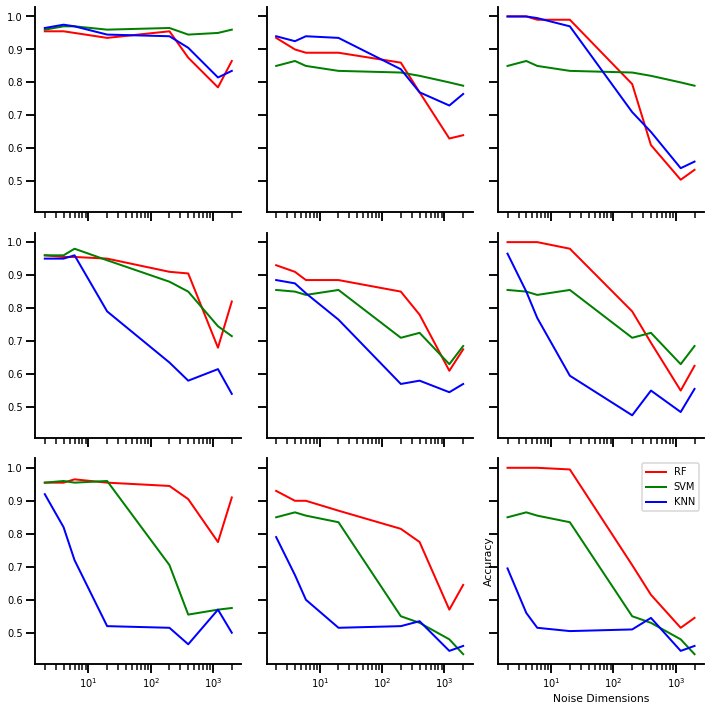

In [137]:
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
sns.set_context("talk", font_scale=0.6)

noise_dim = [2, 4, 6, 20, 200, 400, 1200, 2000]
k1 = 8
k2 = 16
k3 = 24
k4 = 32

data = {'RF': [accuracy_RF1[0:k1], accuracy_RF2[0:k1], accuracy_RF3[0:k1],
               accuracy_RF1[k1:k2],accuracy_RF2[k1:k2],accuracy_RF3[k1:k2],
               accuracy_RF1[k2:k3],accuracy_RF2[k2:k3],accuracy_RF3[k2:k3]],
               #accuracy_RF1[k3:k4], accuracy_RF2[k3:k4], accuracy_RF3[k3:k4]],
        
        'SVM':[accuracy_SVM1[0:k1], accuracy_SVM2[0:k1], accuracy_SVM3[0:k1], 
               accuracy_SVM1[k1:k2], accuracy_SVM2[k1:k2], accuracy_SVM3[k1:k2], 
               accuracy_SVM1[k2:k3], accuracy_SVM2[k2:k3], accuracy_SVM3[k2:k3]],
               #accuracy_SVM1[k3:k4],accuracy_SVM2[k3:k4], accuracy_SVM3[k3:k4]], 
        
       'KNN': [accuracy_KNN1[0:k1], accuracy_KNN2[0:k1], accuracy_KNN3[0:k1],
               accuracy_KNN1[k1:k2],accuracy_KNN2[k1:k2], accuracy_KNN3[k1:k2],
               accuracy_KNN1[k2:k3],accuracy_KNN2[k2:k3], accuracy_KNN3[k2:k3]]}
               #accuracy_KNN1[k3:k4], accuracy_KNN2[k3:k4], accuracy_KNN3[k3:k4]]}

df = pd.DataFrame(data) 
df.head(1)

fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(10,10))
axes_list = [item for sublist in axes for item in sublist] 

for gr in range(9):
    ax = axes_list.pop(0)
    ax.plot(noise_dim, df.ix[gr, 'RF'], marker='', markerfacecolor='red', markersize=12, color='red', linewidth=2, label="RF")
    ax.plot(noise_dim, df.ix[gr, 'SVM'], marker='', color='green', linewidth=2,label="SVM")
    ax.plot(noise_dim, df.ix[gr, 'KNN'],  marker='', color='blue', linewidth=2, label="KNN")
    ax.set_xscale('log')
    #ax.set_ylabel("Accuracy")
    #ax.set_xlabel("Noise Dimensions")
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
ax.set_ylabel("Accuracy")
ax.set_xlabel("Noise Dimensions")
ax.legend()    
for ax in axes_list:
     ax.remove()
    
plt.tight_layout()
    

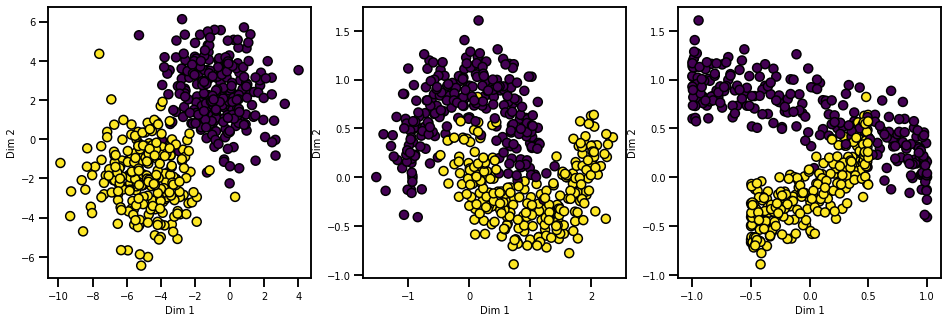

In [127]:
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
sns.set_context("talk", font_scale=0.6)

plt.figure(figsize = (16,5))
plt.subplot(1,3,1)
plt.scatter(X1[:, 0], X1[:, 1], c=y1,edgecolors='k')
plt.xlabel('Dim 1',fontsize=10)
plt.ylabel('Dim 2',fontsize=10)
plt.subplot(1,3,2)
plt.scatter(X2[:, 0], X2[:, 1], c=y2,edgecolors='k')
plt.xlabel('Dim 1',fontsize=10)
plt.ylabel('Dim 2',fontsize=10)
plt.subplot(1,3,3)
plt.scatter(X3[:, 0], X2[:, 1], c=y3,edgecolors='k')
plt.xlabel('Dim 1',fontsize=10)
plt.ylabel('Dim 2',fontsize=10)
plt.show()